In [1]:
%matplotlib inline
from ecell4 import *
from ecell4_base.core import *
from ecell4_base import spatiocyte, bd

In [2]:
w = bd.World(Real3(1, 2, 3))
w.add_molecules(Species("A", 0.005, 0), 120)
w.add_molecules(Species("B", 0.005, 0), 120, AABB(Real3(0, 1, 1.5), Real3(0.5, 2, 2.5)))

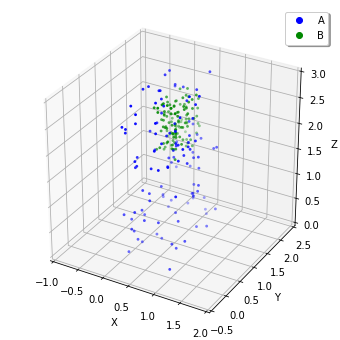

In [3]:
viz.plot_world_with_matplotlib(w)

In [4]:
with species_attributes():
    A | B | C | {"D": 1, "radius": 0.005}

with reaction_rules():
    A + B == C | (0.01, 0.3)

m = get_model()

In [5]:
factory = spatiocyte.Factory(0.005)

In [6]:
w = factory.world(ones())
w.bind_to(m)
w.add_molecules(Species("A"), 60, AABB(Real3(0, 0, 0), Real3(0.5, 1, 1)))
w.add_molecules(Species("B"), 60, AABB(Real3(0.5, 0, 0), Real3(1, 1, 1)))

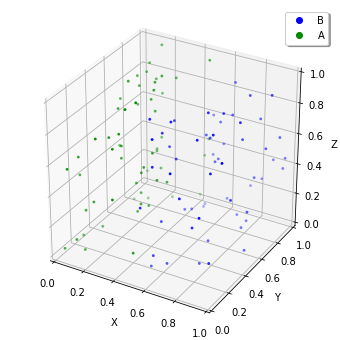

In [7]:
viz.plot_world_with_matplotlib(w)

In [8]:
sim = factory.simulator(w)
obs1 = FixedIntervalHDF5Observer(1e-3, "test%03d.h5")
sim.run(0.05, obs1)

In [9]:
viz.plot_movie_with_matplotlib(obs1)
# viz.plot_movie_with_matplotlib([load_world("test%03d.h5" % _) for _ in range(50)])